## Equally-Weighted Portfolio Backtest.

In [10]:
from __future__ import annotations

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
from qamsi.config.trading_config import TradingConfig
from qamsi.strategies.heuristics.equally_weighted import EWStrategy
from run import Dataset, initialize

In [12]:
REBAL_FREQ = "ME"
DATASET = Dataset.TOPN_US
TOP_N = 30

trading_config = TradingConfig(
    total_exposure=1,
    max_exposure=1,
    min_exposure=0,
    trading_lag_days=1,
)

preprocessor, runner = initialize(
    dataset=DATASET,
    with_causal_window=False,
    trading_config=trading_config,
    topn=TOP_N,
    rebal_freq=REBAL_FREQ,
)

Backtest on 2000-12-29 00:00:00 to 2024-07-31 00:00:00
Num Train Iterations: 283
Num OOS Daily Points: 5932


In [13]:
strategy = EWStrategy()

strategy_name = strategy.__class__.__name__

result = runner(
    feature_processor=preprocessor,
    strategy=strategy,
    hedger=None,
)
result

Computing Weights: 100%|██████████| 283/283 [00:04<00:00, 69.48it/s]


StrategyStatistics:
* final_nav = 6.155802
* geom_avg_total_r = 0.100306
* geom_avg_xs_r = 0.081009
* std_xs_r = 0.205517
* min_xs_r = -0.109368
* max_xs_r = 0.105879
* skew = -0.059176
* kurtosis = 10.082960
* max_dd = -0.525423
* sharpe = 0.394169
* alpha_buy_hold = 0.022734
* tracking_error_buy_hold = 0.044027
* ir_buy_hold = 0.516359
* factor_loadings = {'low_risk': 0.20923424614100858, 'momentum': -0.06755882051498235, 'quality': -0.05226941103417934, 'size': 0.01781793317475854, 'value': -0.12964967980955433, 'spx': 0.9997861701805999}
* alpha_benchmark = 0.024581
* alpha_benchmark_pvalue = 0.009372
* tracking_error_benchmark = 0.039017
* ir_benchmark = 0.629994
* ttest_pval = 0.391369
* levene_pval = 0.042352
* timing_ability_coef = 0.019864
* timing_ability_pval = 0.002994

In [14]:
result.std_xs_r, result.sharpe

(0.20551723318714532, 0.39416921677811556)

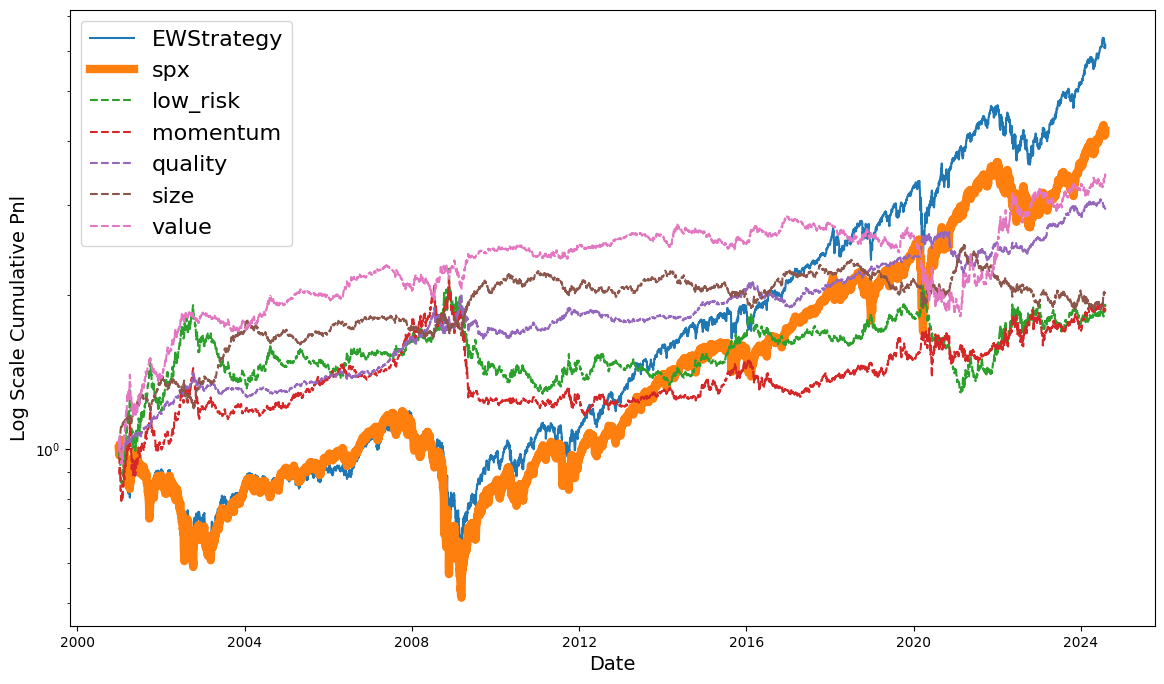

In [15]:
runner.plot_cumulative(
    strategy_name=strategy_name,
    include_factors=True,
)

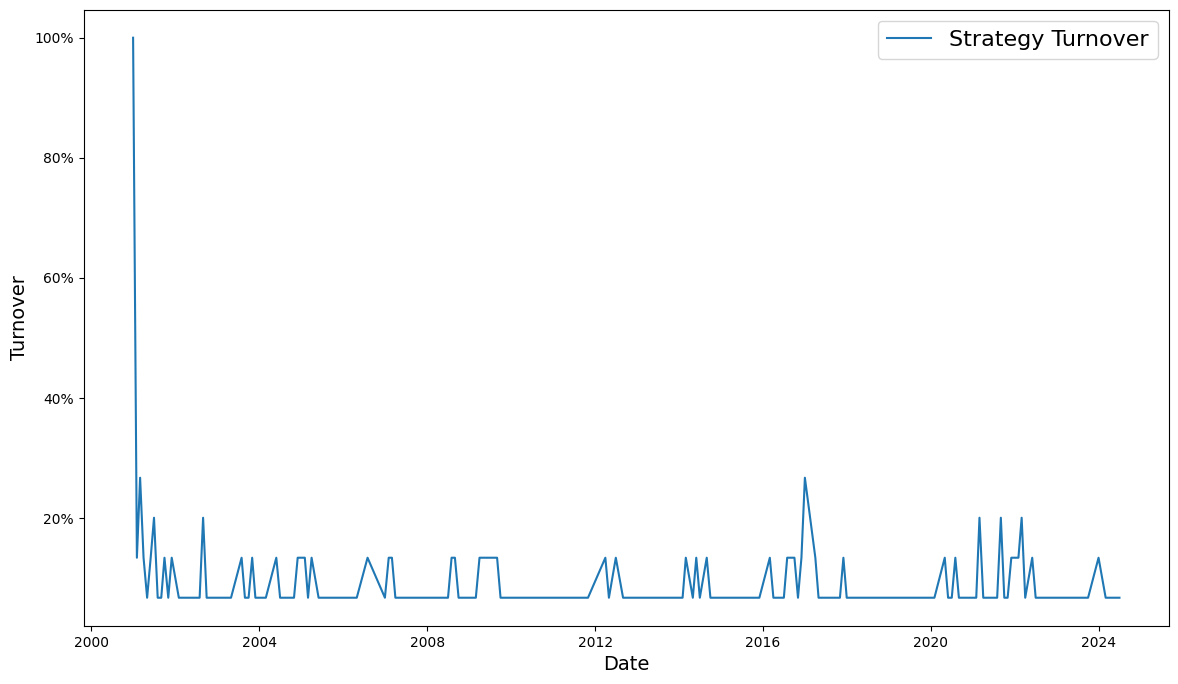

In [16]:
runner.plot_turnover()

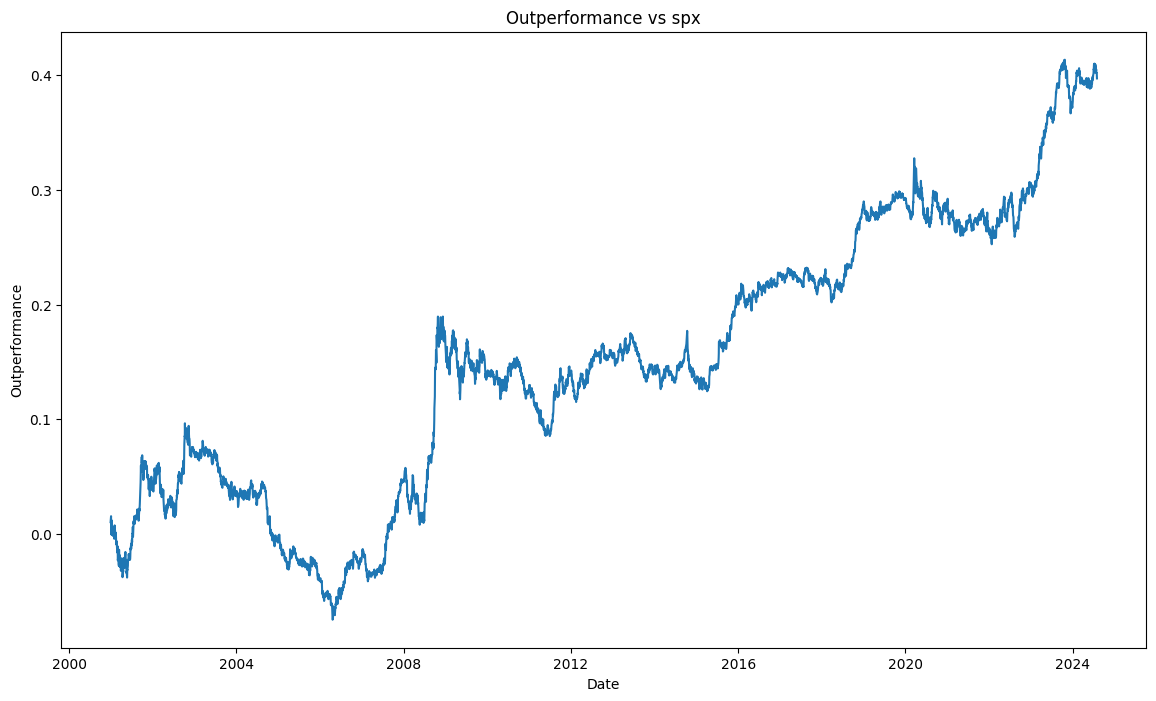

In [17]:
runner.plot_outperformance(mkt_only=True)

In [18]:
runner.save(DATASET.name + strategy_name + f"_rebal{REBAL_FREQ}")